# Challenge#1 - Key Players and hashtags

In [154]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [155]:
df_raw = pd.read_csv('data/cleaned-twitter-data.csv', index_col=0)

df = df_raw.copy()

In [156]:
df.head(5)

,date,content,username,like_count,retweet_count,accounts_mentioned,hashtags
0,2023-03-29 22:58:21+00:00,free ai marketing automation tool strategy col...,RealProfitPros,0,0,[],['ChatGPT']
1,2023-03-29 22:58:18+00:00,@mecolehardman chat gpt say it ’ face_with_te...,AmyLouWho321,0,0,['MecoleHardman4'],[]
2,2023-03-29 22:57:53+00:00,chat pdf check new ai quickly answer question ...,yjleon1976,0,0,[],"['research', 'chatpdf', 'ChatGPT']"
3,2023-03-29 22:57:52+00:00,ai muse court life must face judge destiny jur...,ChatGPT_Thinks,0,0,[],"['OutOfContextAI', 'AILifeLessons', 'ChatGPT']"
4,2023-03-29 22:57:26+00:00,people have not hear chat gpt yet first elite ...,nikocosmonaut,0,0,[],[]


## Most 10 mentioned accounts

In [186]:
# get the value counts of top 10 accounts mentioned in tweets
mentions = df.accounts_mentioned.value_counts()[1:11]
mentions

['OpenAI']            7645
['elonmusk']          3610
['YouTube']           2727
['ChatGPT']           1096
['Google']             706
['sama']               659
['Microsoft']          563
['bing']               443
['AIPADTECH']          416
['crypto_talkies']     370
Name: accounts_mentioned, dtype: int64

In [187]:
mentions.keys()
filtered_mentions = {}
for key in mentions.keys():
    newkey = ast.literal_eval(key)[0]
    filtered_mentions[newkey] = mentions[key]

top_10_mentions = pd.Series(filtered_mentions)
top_10_mentions

OpenAI            7645
elonmusk          3610
YouTube           2727
ChatGPT           1096
Google             706
sama               659
Microsoft          563
bing               443
AIPADTECH          416
crypto_talkies     370
dtype: int64

## Visualisation

<Figure size 1440x1080 with 0 Axes>

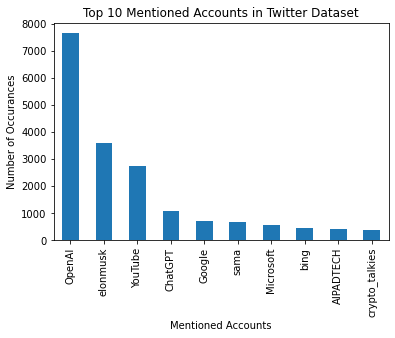

<Figure size 1440x1080 with 0 Axes>

In [189]:
top_10_mentions.plot.bar();
plt.title("Top 10 Mentioned Accounts in Twitter Dataset")
plt.xlabel("Mentioned Accounts");
plt.ylabel("Number of Occurances")
plt.figure(figsize=(20,15))

## Top 20 hastags
#### Hastags are saved in row as list against every tweet. To get accurate overall hastags we need to add them

In [158]:
# hastags seem to be case sensitive which they shouldn't be. For example, ChatGPT & chatgpt are different
hashtags = df.hashtags.value_counts()[1:21]
hashtags.head(5)

['ChatGPT']          84761
['chatgpt']           8455
['ChatGPT', 'AI']     5454
['chatGPT']           4501
['AI', 'ChatGPT']     4375
Name: hashtags, dtype: int64

In [159]:
# convert series to dict
hashtags_dict = hashtags.to_dict()
hashtags_dict

{"['ChatGPT']": 84761,
 "['chatgpt']": 8455,
 "['ChatGPT', 'AI']": 5454,
 "['chatGPT']": 4501,
 "['AI', 'ChatGPT']": 4375,
 "['ChatGPT', 'OpenAI']": 1345,
 "['MidJourney', 'OpenAi', 'GPT', 'StableDiffusion2', 'DallE', 'ChatGPT', 'imagine']": 1219,
 "['OpenAI', 'ChatGPT']": 1094,
 "['ChatGPT', 'ChatGPT']": 811,
 "['trading', 'stocks', 'Options', 'chatgpt']": 789,
 "['technology', 'innovation', 'chatGPT', 'openai', 'programming']": 754,
 "['chatgpt', 'chatgptprompts', 'chatbot', 'chatbotai', 'aichatbot', 'ai', 'artificialintelligence', 'aiprompts', 'prompts', 'writingprompts', 'ideaprompts', 'creativeprompts']": 748,
 "['ai', 'chatgpt']": 710,
 "['CoinEx', 'ChatGPT']": 644,
 "['ChatGPT', 'ArtificialIntelligence']": 580,
 "['Chatgpt']": 576,
 "['chatgpt', 'ai']": 522,
 "['Metaverse', 'AR', 'VR', '100DaysofCode', '5G', 'Web3', 'AI', 'ArtificialIntelligence', 'Gaming', 'ChatGPT', 'IoT', 'Python', 'Tech']": 482,
 "['ChatGPT', 'GPT4']": 475,
 "['ai', 'ChatGPT']": 458}

In [160]:
unique_hastags = {}
# size of dataset
total = df.shape[0]
for tags, value in hashtags_dict.items():
    # convert string representation to list
    _keys = ast.literal_eval(tags)
    for _key in _keys:
        _key = _key.lower()
        if _key in unique_hastags:
            unique_hastags[_key] = unique_hastags[_key] + value
        else:
            unique_hastags[_key] = value
hastags_sr = pd.Series(unique_hastags)

In [161]:
unique_hastags

{'chatgpt': 119564,
 'ai': 12749,
 'openai': 4412,
 'midjourney': 1219,
 'gpt': 1219,
 'stablediffusion2': 1219,
 'dalle': 1219,
 'imagine': 1219,
 'trading': 789,
 'stocks': 789,
 'options': 789,
 'technology': 754,
 'innovation': 754,
 'programming': 754,
 'chatgptprompts': 748,
 'chatbot': 748,
 'chatbotai': 748,
 'aichatbot': 748,
 'artificialintelligence': 1810,
 'aiprompts': 748,
 'prompts': 748,
 'writingprompts': 748,
 'ideaprompts': 748,
 'creativeprompts': 748,
 'coinex': 644,
 'metaverse': 482,
 'ar': 482,
 'vr': 482,
 '100daysofcode': 482,
 '5g': 482,
 'web3': 482,
 'gaming': 482,
 'iot': 482,
 'python': 482,
 'tech': 482,
 'gpt4': 475}

### As 'chatgpt' hashtags is highest among all which is obvious so we can probably avoid it from the list

In [162]:
df_hashtags = pd.DataFrame(list(unique_hastags.items()), columns=["hashtags", "count"])
df_hashtags_top20 = df_hashtags[1:21].sort_values(by="count", ascending=False)

In [163]:
total = df.shape[0]
df_hashtags_top20["share"] = (df_hashtags_top20["count"]/total)*100
df_hashtags_top20

,hashtags,count,share
1,ai,12749,2.549933
2,openai,4412,0.882446
18,artificialintelligence,1810,0.362019
3,midjourney,1219,0.243813
4,gpt,1219,0.243813
5,stablediffusion2,1219,0.243813
6,dalle,1219,0.243813
7,imagine,1219,0.243813
8,trading,789,0.157808
9,stocks,789,0.157808


## Visualisation

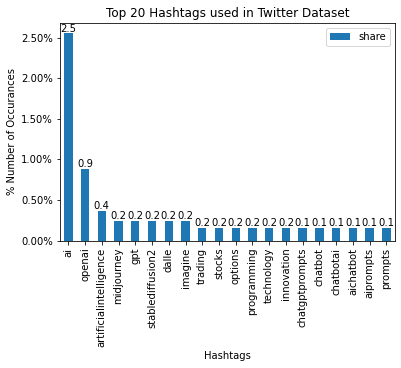

<Figure size 1440x1080 with 0 Axes>

In [173]:
ax = df_hashtags_top20.plot.bar(x='hashtags', y='share', linewidth=5)
plt.title("Top 20 Hashtags used in Twitter Dataset")
plt.xlabel("Hashtags");
plt.ylabel("% Number of Occurances")
plt.figure(figsize=(20,15))
# plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
labels = df_hashtags_top20['share'].round(1).astype('str') #+ '%'
for container in ax.containers:
    ax.bar_label(container, labels=labels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()